## **ECOM90025 ADA Tutorial 6** ##

In [ ]:
!pip install -q causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install -q dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
# library packages
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt # type: ignore
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns # type: ignore
from causalml.match import NearestNeighborMatch # type: ignore
from causalml.match import create_table_one # type: ignore
import dowhy.datasets # type: ignore

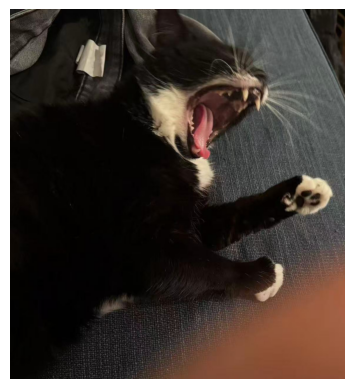

In [ ]:
#https://drive.google.com/file/d/1zzExPRbMloq_i-igp_w5HVuZQUaA7NGv/view?usp=sharing
url = 'https://drive.google.com/uc?id=1zzExPRbMloq_i-igp_w5HVuZQUaA7NGv'

# Download and open the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# my state this week with 2 mid exams
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

### **DID regression**

In [ ]:
# read in the data
data = pd.read_csv("https://www.dropbox.com/scl/fi/6grt5efg3v9ihopu4vky0/KIELMC.csv?rlkey=vmtq4ub25gtnn620x65vtgo6d&dl=1")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      321 non-null    int64  
 1   age       321 non-null    int64  
 2   agesq     321 non-null    int64  
 3   nbh       321 non-null    int64  
 4   cbd       321 non-null    int64  
 5   intst     321 non-null    int64  
 6   lintst    321 non-null    float64
 7   price     321 non-null    int64  
 8   rooms     321 non-null    int64  
 9   area      321 non-null    int64  
 10  land      321 non-null    int64  
 11  baths     321 non-null    int64  
 12  dist      321 non-null    int64  
 13  ldist     321 non-null    float64
 14  wind      321 non-null    int64  
 15  lprice    321 non-null    float64
 16  y81       321 non-null    int64  
 17  larea     321 non-null    float64
 18  lland     321 non-null    float64
 19  y81ldist  321 non-null    float64
 20  lintstsq  321 non-null    float6

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,...,11.00210,0,7.414573,8.429017,0.0,47.71770,1,0,60000.0,11.00210
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,...,10.59663,0,7.867871,9.032409,0.0,47.71770,1,0,40000.0,10.59663
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,...,10.43412,0,7.042286,8.517193,0.0,47.71770,1,0,34000.0,10.43412
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,...,11.06507,0,7.035269,9.210340,0.0,47.71770,1,0,63900.0,11.06507
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,...,10.69195,0,7.532624,9.210340,0.0,57.77368,1,0,44000.0,10.69195


In [ ]:
# run the fundamental OLS expressions
fit1981 = smf.ols(formula="rprice ~ nearinc", data=data[data['y81'] == 1]).fit()

# Display the summary of the model
print(fit1981.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     27.73
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           5.14e-07
Time:                        11:15:52   Log-Likelihood:                -1670.1
No. Observations:                 142   AIC:                             3344.
Df Residuals:                     140   BIC:                             3350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.013e+05   3093.027     32.754      0.0

In [ ]:
# Second regression: Housing prices on 1978 data
fit1978 = smf.ols(formula="rprice ~ nearinc", data=data[data['y81'] == 0]).fit()

# Display the summary of the model
print(fit1978.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.74
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           0.000105
Time:                        11:15:52   Log-Likelihood:                -2094.9
No. Observations:                 179   AIC:                             4194.
Df Residuals:                     177   BIC:                             4200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.252e+04   2653.790     31.094      0.0

In [ ]:
# what is the DID effect
print(fit1981.params['nearinc'] - fit1978.params['nearinc'])

-11863.903260384563


In [ ]:
# we can check confirm the DID effect
fit_did = smf.ols(formula="rprice ~ nearinc * y81", data=data).fit()

print(fit_did.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           4.22e-13
Time:                        11:15:52   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.252e+04   2726.910     30.260      

### **RDD**

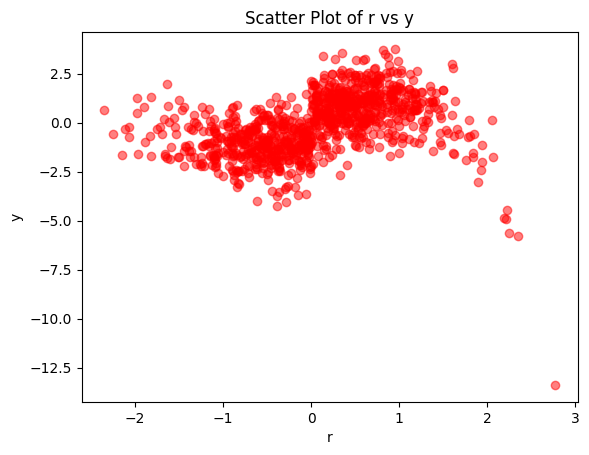

Local ATE: 1.5


In [ ]:
# The data that we are going to load in is actually generated via simulation
# to help us understand the process later better
# we present the code of simulation
# Set the random seed
np.random.seed(90025)
# ---------------------------------------------------------------------
#   Left model : y = a0 + a1*r + a2^2
#   Right model: y = b0 + b1*r + b2^r2 + b3*r^3
# ---------------------------------------------------------------------
# Given coefficients
a0 = -1
a1 = 0.5
a2 = 0.5
b0 = 0.5
b1 = 0.5
b2 = 1
b3 = -1
# The local average treatment effect (LATE) around the forcing
# threshold of r = 0 is b0 - a0 = 1.5.
# ---------------------------------------------------------------------
local_ate = b0 - a0

# Generate synthetic data
N = 1000

# Generate the values of the forcing variable
# (note that the average is around zero.)
r      = np.random.normal(size=N) * 0.8

# Generate a list of N zeros (we'll populate this soon...)
# The y.true variable is something I'm doing for extra clarity.
y      = np.zeros(N)
y_true = np.zeros(N)

# Create the indices denoting values below and above the threshold
ind0   = r <= 0
ind1   = r > 0

# FOR ILLUSTRATION: let's first generate the values according to
# the true model, but WITHOUT any noise so you can see the true function
# ---------------------------------------------------------------------
y_true[ind0] = a0 + a1 * r[ind0] + a2 * r[ind0]**2
y_true[ind1] = b0 + b1 * r[ind1] + b2 * r[ind1]**2 + b3 * r[ind1]**3

# Now let's add some random noise
y[ind0] = a0 + a1 * r[ind0] + a2 * r[ind0]**2                   + np.random.normal(size=np.sum(ind0))
y[ind1] = b0 + b1 * r[ind1] + b2 * r[ind1]**2 + b3 * r[ind1]**3 + np.random.normal(size=np.sum(ind1))

# How does the data look?
# ---------------------------------------------------------------------
plt.scatter(r, y, color='red', alpha=0.5)
plt.xlabel('r')
plt.ylabel('y')
plt.title('Scatter Plot of r vs y')
plt.show()

print(f"Local ATE: {local_ate}")

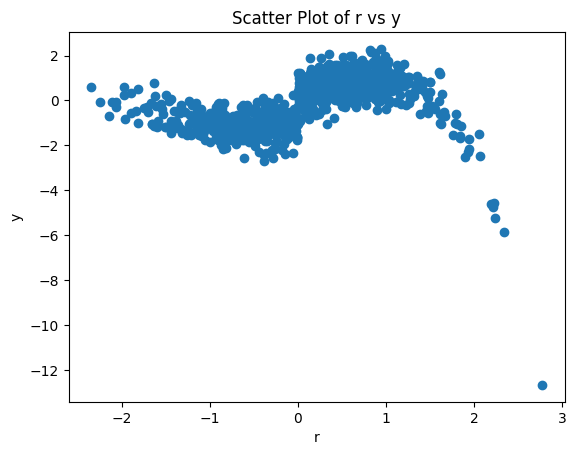

In [ ]:
# https://drive.google.com/file/d/1g1bqv3-cQic5ORNieT9UvK0m8EA7eR0S/view?usp=drive_link
file_id = "1g1bqv3-cQic5ORNieT9UvK0m8EA7eR0S"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

# Plot a scatter plot of y and r
plt.scatter(df['r'], df['y'])
plt.xlabel('r')
plt.ylabel('y')
plt.title('Scatter Plot of r vs y')
plt.show()

In [ ]:
# We can first see what ATE captures
model_ols = smf.ols(formula="y ~ r * d", data=df).fit()

# Display the summary of the model
print(model_ols.summary())

# IT'S CAPTURING A EFFECT OF 2.38
# remember our true ATE is 1.5

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     406.4
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          2.41e-172
Time:                        13:19:37   Log-Likelihood:                -1171.0
No. Observations:                1000   AIC:                             2350.
Df Residuals:                     996   BIC:                             2370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2654      0.061    -20.717      

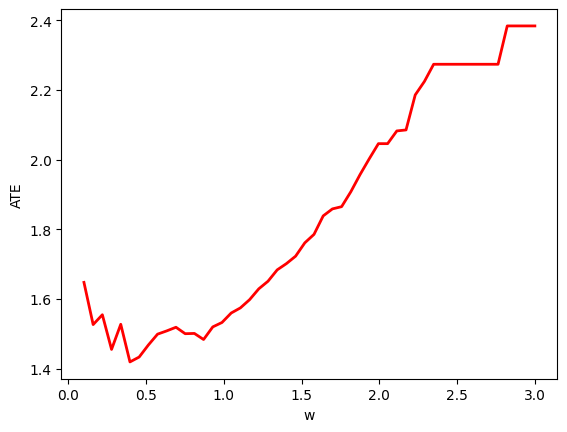

In [ ]:
# create 50 values for bandwidth
# for each bandwidth w, we do local regression only using |r|<= w
# for example when this w=0.2, we use only data with -0.2<r<0.2
w = np.linspace(0.1, 3, num=50)
ate = np.zeros(50)

# loop over for the candidates
for ii in range(50):
    model = smf.ols(formula="y ~ r * d", data=df[np.abs(df['r']) < w[ii]]).fit()
    ate[ii] = model.params['d[T.True]']

# Plot ATE using different bandwidth
plt.plot(w, ate, color='red', linewidth=2)
plt.xlabel('w')
plt.ylabel('ATE')
plt.show()
# we can see that ATE is indeed very sensitive to neighbourhood selection
# The next step will be choosing an optimal bandwidth
# we can do it with very rigours process (IK/CCT etc)

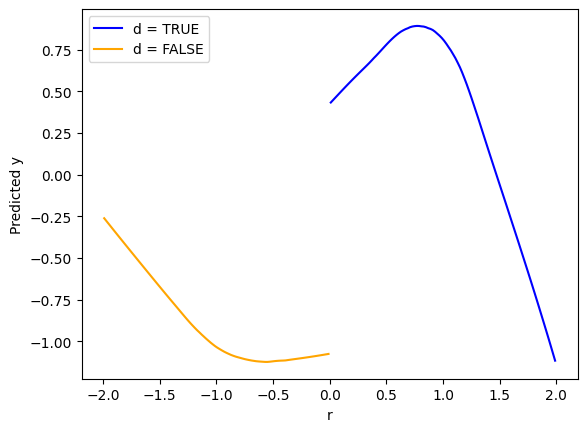

np.float64(1.5095511246876858)

In [ ]:
# Subset data for d = TRUE and fit LOWESS model
subset_data_a = df[df['d']]
fita = lowess(subset_data_a['y'], subset_data_a['r'])

# Subset data for d = FALSE and fit LOWESS model
subset_data_b = df[~df['d']]
fitb = lowess(subset_data_b['y'], subset_data_b['r'])

# But LOWESS only create fits for data that exist (r in the data)
# To draw the smooth curves we need to interpolate the values
# Generate sequence of values for prediction
rr = np.linspace(0.01, 2 - 0.01, num=100)

# Make predictions using LOESS models
preda = np.interp(rr, fita[:, 0], fita[:, 1])
predb = np.interp(-rr, fitb[:, 0], fitb[:, 1])

plt.plot(rr, preda, color='blue', label='d = TRUE')
plt.plot(-rr, predb, color='orange', label='d = FALSE')
plt.xlabel('r')
plt.ylabel('Predicted y')
plt.legend()
plt.show()

# make prediction about the jump
preda[0] - predb[0]

### **Matching**

A data frame with 445 observations, corresponding to 185 treated and 260 control subjects. The treatment assignment indicator is the first variable of the data frame: treatment (1 = treated; 0 = control). More covariates are:

- age, measured in years;
- education, measured in years;
- black, indicating race (1 if black, 0 otherwise);
- hispanic, indicating race (1 if Hispanic, 0 otherwise);
- married, indicating marital status (1 if married, 0 otherwise);
- nodegree, indicating high school diploma (1 if no degree, 0 otherwise);
- re74, real earnings in 1974;
- re75, real earnings in 1975.
- The last variable of the data frame is re78, the real the earnings in 1978.
- u74 and u75 are derived, meaning zero income or not in the corresponding year.

In [ ]:
lalonde = dowhy.datasets.lalonde_dataset() #ignore
lalonde

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75
0,False,23.0,10.0,1.0,0.0,0.0,1.0,0.00,0.00,0.000,1.0,1.0
1,False,26.0,12.0,0.0,0.0,0.0,0.0,0.00,0.00,12383.680,1.0,1.0
2,False,22.0,9.0,1.0,0.0,0.0,1.0,0.00,0.00,0.000,1.0,1.0
3,False,18.0,9.0,1.0,0.0,0.0,1.0,0.00,0.00,10740.080,1.0,1.0
4,False,45.0,11.0,1.0,0.0,0.0,1.0,0.00,0.00,11796.470,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440,True,33.0,12.0,1.0,0.0,1.0,0.0,20279.95,10941.35,15952.600,0.0,0.0
441,True,25.0,14.0,1.0,0.0,1.0,0.0,35040.07,11536.57,36646.950,0.0,0.0
442,True,35.0,9.0,1.0,0.0,1.0,1.0,13602.43,13830.64,12803.970,0.0,0.0
443,True,35.0,8.0,1.0,0.0,1.0,1.0,13732.07,17976.15,3786.628,0.0,0.0


In [ ]:
lalonde.info()
lalonde['treat'] = lalonde['treat'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   treat    445 non-null    bool   
 1   age      445 non-null    float64
 2   educ     445 non-null    float64
 3   black    445 non-null    float64
 4   hisp     445 non-null    float64
 5   married  445 non-null    float64
 6   nodegr   445 non-null    float64
 7   re74     445 non-null    float64
 8   re75     445 non-null    float64
 9   re78     445 non-null    float64
 10  u74      445 non-null    float64
 11  u75      445 non-null    float64
dtypes: bool(1), float64(11)
memory usage: 38.8 KB


In [ ]:
# we select covariates that are not treatment, dependent variables, zero income and not applicable
# so for the rest of personal characteristics type of variables we do scoring table
X = [col for col in lalonde.columns if col not in ['treat', 're78', 'u74', 're75', 're74', 'u75']]

# Causalml's table function average of each group/SMD (standarized mean difference)
# This section is not doing match yet, just balance check
table1 = create_table_one(lalonde, 'treat', X)
table1

,Control,Treatment,SMD
Variable,,,
n,260,185,
age,25.05 (7.06),25.82 (7.16),0.1073
black,0.83 (0.38),0.84 (0.36),0.0439
educ,10.09 (1.61),10.35 (2.01),0.1412
hisp,0.11 (0.31),0.06 (0.24),-0.1746
married,0.15 (0.36),0.19 (0.39),0.0936
nodegr,0.83 (0.37),0.71 (0.46),-0.304


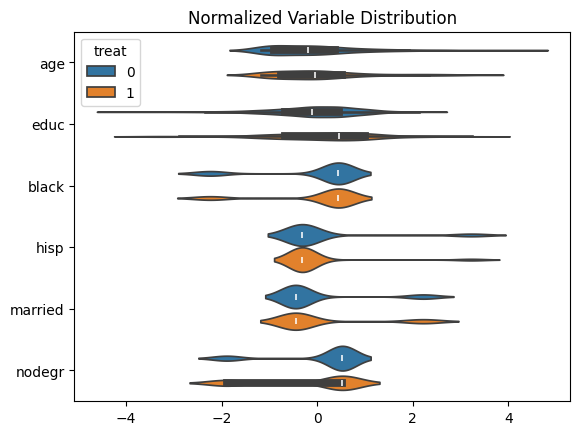

In [ ]:
# to see the information of table more directly in plot
def plot_distributions(df, X, d):
    df_long = df.copy()[X + [d]]
    df_long[X] =(df_long[X] - df_long[X].mean()) / df_long[X].std()
    df_long = pd.melt(df_long, id_vars=d, value_name='value')
    sns.violinplot(y="variable", x="value", hue=d, data=df_long, split=False).set(xlabel="", ylabel="", title="Normalized Variable Distribution")

plot_distributions(lalonde, X, "treat")

In [ ]:
# now we starts doing matching
psm = NearestNeighborMatch(
    replace=True,  # that is saying one control can be use repetitively
    ratio=1, # 1:1 match
    random_state=1,
    caliper=0.2 # the distance benchmark between matching, in SMD
    )

lalonde_matched = psm.match(data=lalonde, treatment_col="treat", score_cols=X)

# we can observe the sample size difference before and after the matching
lalonde.treat.value_counts(), lalonde_matched.treat.value_counts()

(treat
 0    260
 1    185
 Name: count, dtype: int64,
 treat
 1    153
 0    153
 Name: count, dtype: int64)

In [ ]:
table1_matched = create_table_one(lalonde_matched, "treat", X)
table1_matched

,Control,Treatment,SMD
Variable,,,
n,153,153,
age,24.31 (5.52),24.26 (5.57),-0.0083
black,0.89 (0.32),0.89 (0.32),0.0
educ,10.36 (1.52),10.36 (1.52),0.0
hisp,0.04 (0.19),0.04 (0.19),0.0
married,0.14 (0.35),0.14 (0.35),0.0
nodegr,0.75 (0.43),0.75 (0.43),0.0


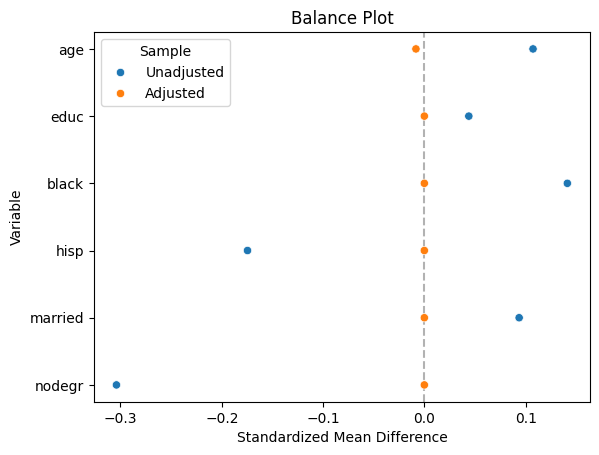

In [ ]:
# we can plot a graph to see the difference before and after matching
def plot_balance(t1, t2, X):
    df_smd = pd.DataFrame({"Variable": X + X,
                           "Sample": ["Unadjusted" for _ in range(len(X))] + ["Adjusted" for _ in range(len(X))],
                           "Standardized Mean Difference": t1["SMD"][1:].to_list() + t2["SMD"][1:].to_list()})

    sns.scatterplot(x="Standardized Mean Difference", y="Variable", hue="Sample", data=df_smd).set(title="Balance Plot")
    plt.axvline(x=0, color='k', ls='--', zorder=-1, alpha=0.3);

plot_balance(table1, table1_matched, X)

In [ ]:
# Fit OLS model using the adjusted and not adjusted data set to see the difference
reg1 = smf.ols("re78 ~ treat", data=lalonde_matched).fit()
reg2 = smf.ols("re78 ~ treat", data=lalonde).fit()

print(reg1.summary())
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.187
Date:                Mon, 08 Sep 2025   Prob (F-statistic):            0.00451
Time:                        13:43:42   Log-Likelihood:                -3112.7
No. Observations:                 306   AIC:                             6229.
Df Residuals:                     304   BIC:                             6237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3859.6694    513.518      7.516      0.0